In [1]:
import json
import requests
from bs4 import BeautifulSoup

In [2]:
data_url = 'https://www.imdb.com/chart/toptv'
r = requests.get(data_url)

In [3]:
r.url

'https://www.imdb.com/chart/toptv'

In [4]:
r.json

<bound method Response.json of <Response [200]>>

In [5]:
r.status_code

200

In [6]:
base_url = 'http://www.imdb.com/chart/toptv'


params = dict(params='num_votes,desc', start=1, title_type='feature', year='1950,2018')


r = requests.get(base_url, params=params)

r.url

'https://www.imdb.com/chart/toptv?params=num_votes%2Cdesc&start=1&title_type=feature&year=1950%2C2018'

In [7]:
import urllib.request
from bs4 import BeautifulSoup
from html.parser import HTMLParser
url = "http://www.imdb.com/chart/toptv"
htmlfile = urllib.request.urlopen(url)
soup = BeautifulSoup(htmlfile, 'html.parser')

links = soup.findAll('a',href = True)
print(links[5])

<a href="/showtimes/?ref_=nv_tp_sh_3">Showtimes</a>


In [8]:
site_url = 'https://www.imdb.com/chart/toptv/'

r = requests.get(site_url)

soup = BeautifulSoup(r.text, 'lxml')

In [9]:
soup.find_all("a")

[<a class="navbarSprite" href="/?ref_=nv_home" id="home_img" title="Home"></a>,
 <a href="/?ref_=nv_home" title="Home">IMDb</a>,
 <a href="/search/">More</a>,
 <a href="/movies-in-theaters/?ref_=nv_tp_inth_1">Movies</a>,
 <a href="/chart/toptv/?ref_=nv_tp_tv250_2">TV</a>,
 <a href="/showtimes/?ref_=nv_tp_sh_3">Showtimes</a>,
 <a class="fallback" href="/title/tt0112573/?ref_=nv_mv_dflt_1" title="                            Braveheart
 , #75 on IMDb Top Rated Movies">
 </a>,
 <a href="/title/tt0112573/?ref_=nv_mv_dflt_2" id="titleMenuImageClick">
 <strong>                            Braveheart
 </strong> (1995)
                                 </a>,
 <a href="/chart/top?ref_=nv_mv_dflt_3" id="titleMenuImageSecondaryClick">
                                     #<strong>75</strong> on IMDb Top Rated Movies
                                 </a>,
 <a href="/movies-in-theaters/?ref_=nv_mv_inth_1">In Theaters</a>,
 <a href="/showtimes/?ref_=nv_mv_sh_2">Showtimes &amp; Tickets</a>,
 <a href="/t

In [10]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
url = 'http://www.imdb.com/chart/toptv'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [a.attrs.get('data-value') for a in soup.select('td.posterColumn span[name=ir]')]
votes = [a.attrs.get('data-value') for a in soup.select('td.posterColumn span[name=nv]')]



imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)

for item in imdb:
    print(item['place'], '-', 'Title:', item['movie_title'], 
          '('+item['year']+') -', 'Rating:', item['rating'], 'Votes:', item['vote'])

1 - Title: Planet Earth II (2016) - Rating: 9.507349196475703 Votes: 51556
2 - Title: Band of Brothers (2001) - Rating: 9.464643777873855 Votes: 287751
3 - Title: Planet Earth (2006) - Rating: 9.451153508254933 Votes: 132679
4 - Title: Game of Thrones (2011) - Rating: 9.445480357524815 Votes: 1320979
5 - Title: Breaking Bad (2008) - Rating: 9.414645627151042 Votes: 1087528
6 - Title: The Wire (2002) - Rating: 9.315166163813071 Votes: 225993
7 - Title: Cosmos: A Spacetime Odyssey (2014) - Rating: 9.259408500022717 Votes: 84552
8 - Title: Rick and Morty (2013) - Rating: 9.253461183240521 Votes: 212288
9 - Title: Cosmos (1980) - Rating: 9.229832781137938 Votes: 27889
1 - Title:  Blue Planet II (2017) - Rating: 9.15371879928904 Votes: 8153
11 - Title: The World at War (1973) - Rating: 9.15085823917868 Votes: 15993
12 - Title: The Sopranos (1999) - Rating: 9.149825763320978 Votes: 228165
13 - Title: Avatar: The Last Airbender (2003) - Rating: 9.121041527070783 Votes: 167554
14 - Title: Life

153 - Title: Dr Horrible's Sing-Along Blog (2008) - Rating: 8.527831563023149 Votes: 38353
154 - Title: Vikings (2013) - Rating: 8.525980576263368 Votes: 291534
155 - Title: Dragon Ball: Doragon bôru (1986) - Rating: 8.525946789783507 Votes: 36630
156 - Title: Dragon Ball (1995) - Rating: 8.523877834787742 Votes: 43007
157 - Title: The Office (2001) - Rating: 8.520801420953344 Votes: 80255
158 - Title: The Daily Show (1996) - Rating: 8.518447811646453 Votes: 39795
159 - Title: The IT Crowd (2006) - Rating: 8.515827399750723 Votes: 108786
160 - Title: Impractical Jokers (2011) - Rating: 8.514297304781879 Votes: 24729
161 - Title: House of Cards (1990) - Rating: 8.512352570949972 Votes: 10720
162 - Title: Mr Robot (2015) - Rating: 8.51105473482674 Votes: 255246
163 - Title: Silicon Valley (2014) - Rating: 8.510707845650604 Votes: 92110
164 - Title: Whose Line Is It Anyway? (1998) - Rating: 8.510370943348027 Votes: 35361
165 - Title: Tinker Tailor Soldier Spy (1979) - Rating: 8.5073224513

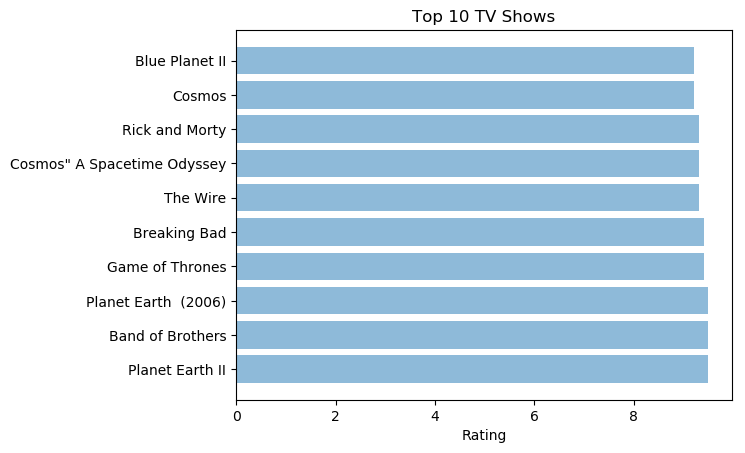

In [11]:
# Plot the rating
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Planet Earth II', 'Band of Brothers', 'Planet Earth  (2006)', 'Game of Thrones', 'Breaking Bad', 
          "The Wire", 'Cosmos" A Spacetime Odyssey', 'Rick and Morty', 'Cosmos', 'Blue Planet II')
y_pos = np.arange(len(movies))
rating = [9.5,9.5,9.5,9.4,9.4,9.3,9.3,9.3,9.2,9.2]
 
plt.barh(y_pos, rating, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Rating')
plt.title('Top 10 TV Shows')
 
plt.show()

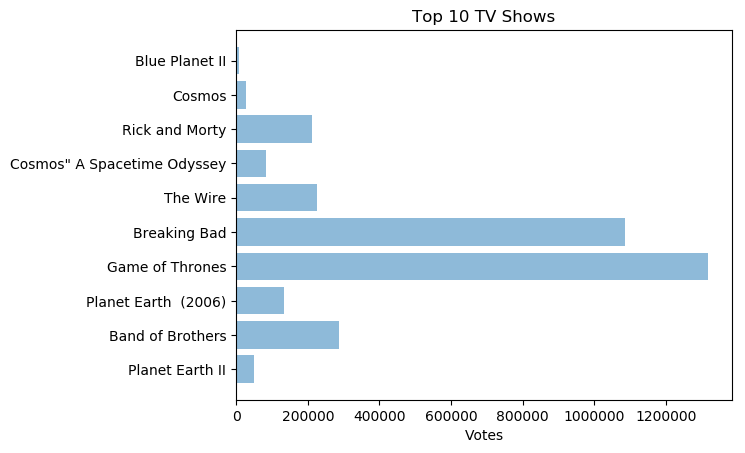

In [12]:
# Plot the top 10 tv shows votes
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Planet Earth II', 'Band of Brothers', 'Planet Earth  (2006)', 'Game of Thrones', 'Breaking Bad', 
          "The Wire", 'Cosmos" A Spacetime Odyssey', 'Rick and Morty', 'Cosmos', 'Blue Planet II')
y_pos = np.arange(len(movies))
votes = [51153,287185,134202,1318379,1085589,225602,84308,210888,27833,7817] 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Votes')
plt.title('Top 10 TV Shows')
 
plt.show()

In [13]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=nv]')]



imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)

for item in imdb:
    print(item['place'], '-', 'Title:', item['movie_title'], '('+item['year']+') -', 'Rating:', item['rating'], 'Votes:', item['vote'])

1 - Title: The Shawshank Redemption (1994) - Rating: 9.216653642064772 Votes: 1955504
2 - Title: The Godfather (1972) - Rating: 9.159263805016536 Votes: 1338679
3 - Title: The Godfather: Part II (1974) - Rating: 8.994313101466137 Votes: 926159
4 - Title: The Dark Knight (2008) - Rating: 8.955668539648514 Votes: 1927789
5 - Title: 12 Angry Men (1957) - Rating: 8.90923581663883 Votes: 543947
6 - Title: Schindler's List (1993) - Rating: 8.898302800185348 Votes: 1008777
7 - Title: The Lord of the Rings: The Return of the King (2003) - Rating: 8.868564089431532 Votes: 1396113
8 - Title: Pulp Fiction (1994) - Rating: 8.865530197279442 Votes: 1529502
9 - Title: The Good, the Bad and the Ugly (1966) - Rating: 8.83216380020271 Votes: 580653
1 - Title:  Fight Club (1999) - Rating: 8.783982607327374 Votes: 1567934
11 - Title: The Lord of the Rings: The Fellowship of the Ring (2001) - Rating: 8.769103790786087 Votes: 1413705
12 - Title: Forrest Gump (1994) - Rating: 8.734384159997951 Votes: 148501

169 - Title: Cool Hand Luke (1967) - Rating: 8.104886819374771 Votes: 139704
170 - Title: Kill Bill: Vol 1 (2003) - Rating: 8.104343669058279 Votes: 848078
171 - Title: Rebecca (1940) - Rating: 8.102407839277678 Votes: 104280
172 - Title: Sunrise (1927) - Rating: 8.100519650165339 Votes: 39826
173 - Title: Tokyo Story (1953) - Rating: 8.099555810089337 Votes: 39041
174 - Title: Shutter Island (2010) - Rating: 8.099517840546438 Votes: 933668
175 - Title: Hacksaw Ridge (2016) - Rating: 8.096883937754418 Votes: 319225
176 - Title: Mary and Max (2009) - Rating: 8.095378088369769 Votes: 142161
177 - Title: How to Train Your Dragon (2010) - Rating: 8.094809450481588 Votes: 566848
178 - Title: The Bandit (1996) - Rating: 8.093370444228494 Votes: 50520
179 - Title: Gone Girl (2014) - Rating: 8.093045142858754 Votes: 703080
180 - Title: Into the Wild (2007) - Rating: 8.08660706696688 Votes: 496431
181 - Title: Relatos salvajes (2014) - Rating: 8.086191724241049 Votes: 134262
182 - Title: Life o

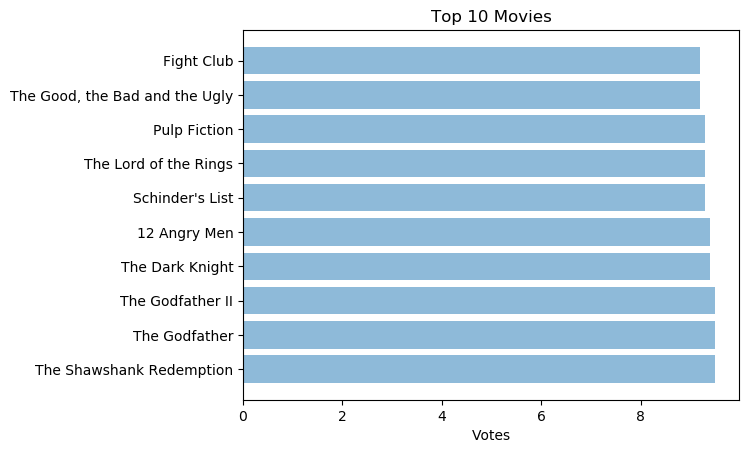

In [16]:
# Plot the top 10 movies rating
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('The Shawshank Redemption', 'The Godfather', 'The Godfather II', 'The Dark Knight', '12 Angry Men', 
          "Schinder's List", 'The Lord of the Rings', 'Pulp Fiction', 'The Good, the Bad and the Ugly', 'Fight Club')
y_pos = np.arange(len(movies))
votes = (9.2, 9.2, 9.0, 9.0, 8.9,
         8.9, 8.9, 8.9, 8.8, 8.8) 
plt.barh(y_pos, rating, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Votes')
plt.title('Top 10 Movies')
 
plt.show()

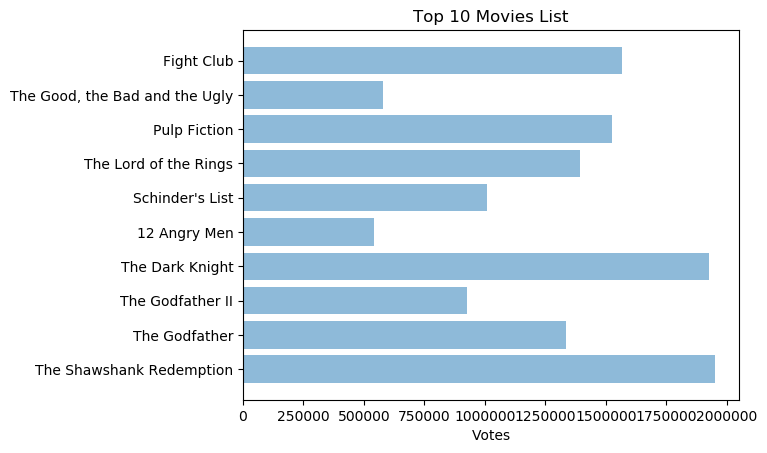

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('The Shawshank Redemption', 'The Godfather', 'The Godfather II', 'The Dark Knight', '12 Angry Men', 
          "Schinder's List", 'The Lord of the Rings', 'Pulp Fiction', 'The Good, the Bad and the Ugly', 'Fight Club')
y_pos = np.arange(len(movies))
rating = (1952196, 1336257, 924345, 1924425, 542788,
         1007034, 1393835, 1526625, 579661, 1564986) 
plt.barh(y_pos, rating, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Votes')
plt.title('Top 10 Movies List')
 
plt.show()


In [18]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
url = 'https://www.imdb.com/chart/bottom?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=MBKX80C7C5B4WMEXBJ9W&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_ql_8'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=nv]')]



imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)

for item in imdb:
    print(item['place'], '-', 'Title:', item['movie_title'], '('+item['year']+') -', 'Rating:', item['rating'], 'Votes:', item['vote']),

1 - Title: Code Name: KOZ (2015) - Rating: 1.3802611881245643 Votes: 26337
2 - Title: Saving Christmas (2014) - Rating: 1.4874991460253133 Votes: 13626
3 - Title: Superbabies: Baby Geniuses 2 (2004) - Rating: 1.6002367097836374 Votes: 27551
4 - Title: Daniel the Wizard (2004) - Rating: 1.601029496381753 Votes: 13532
5 - Title: Manos: The Hands of Fate (1966) - Rating: 1.6856232588978193 Votes: 32652
6 - Title: Foodfight! (2012) - Rating: 1.7219095167343323 Votes: 7130
7 - Title: Pledge This! (2006) - Rating: 1.7296883944025305 Votes: 16136
8 - Title: Dünyayi Kurtaran Adam'in Oglu (2006) - Rating: 1.7519623089143732 Votes: 14660
9 - Title: Álomnet (2009) - Rating: 1.7927582146759635 Votes: 8846
1 - Title:  Titanic - La leggenda continua (2000) - Rating: 1.8200304138132684 Votes: 8681
11 - Title: Birdemic: Shock and Terror (2010) - Rating: 1.8254914124570372 Votes: 17617
12 - Title: Attack of the Jurassic Shark (2012) - Rating: 1.8648171310401662 Votes: 3418
13 - Title: Zombie Nation (20

''

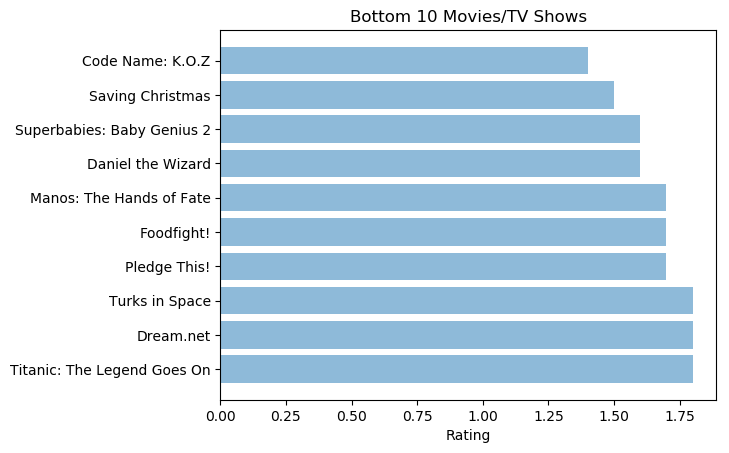

In [19]:
# Plot the bottom 10 tv shows/movies rating
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Titanic: The Legend Goes On', 'Dream.net', 'Turks in Space', 'Pledge This!', 'Foodfight!', 
          'Manos: The Hands of Fate', 'Daniel the Wizard', 'Superbabies: Baby Genius 2', 'Saving Christmas', 'Code Name: K.O.Z')
y_pos = np.arange(len(movies))
rating = (1.8, 1.8, 1.8, 1.7, 1.7, 1.7, 1.6, 1.6, 1.5, 1.4)
 
plt.barh(y_pos, rating, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Rating')
plt.title('Bottom 10 Movies/TV Shows')
 
plt.show()


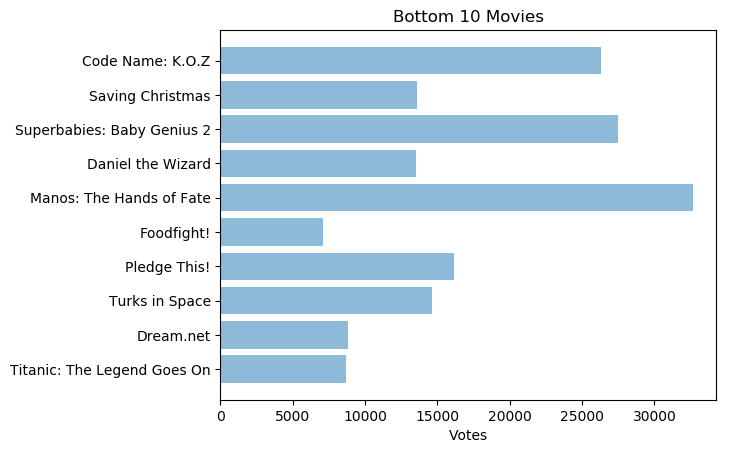

In [20]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Titanic: The Legend Goes On', 'Dream.net', 'Turks in Space', 'Pledge This!', 'Foodfight!', 
          'Manos: The Hands of Fate', 'Daniel the Wizard', 'Superbabies: Baby Genius 2', 'Saving Christmas', 'Code Name: K.O.Z')
y_pos = np.arange(len(movies))
votes = (8679, 8840, 14654, 16132, 7060, 32642, 13529, 27489, 13615, 26304)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, movies)
plt.xlabel('Votes')
plt.title('Bottom 10 Movies')
 
plt.show()

In [67]:
# The following is Top TV Shows Review
#Planet Earth II Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt5491994/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))


Title: >10

Review: As Planet Earth I was released about ten years ago, a visual improvement could have been expected due to the use of advanced technology, but man, did they up their game. The camera-work and the use of music were both truly superb, as well as the editing in which different sub- segments were all synced so well with the narrating of it by David Attenborough. It was nothing like a nature documentary, it was way beyond that. The short and different segments, were movies on itself. It contained all the different genres, from experiencing the thrill in a Hollywood-like impossible action-escape scenario to having a comical and truly euphoric moment of realization about the true extent of what nature has to offer. And this was all brought so incredibly well.If we had any more of such heavenly quality programs on TV, I would simply just glue my eyes to my TV and live out the rest of my life as a vegetable.


Title: At once awe-inspiring and terrifying!

Review: I have just f

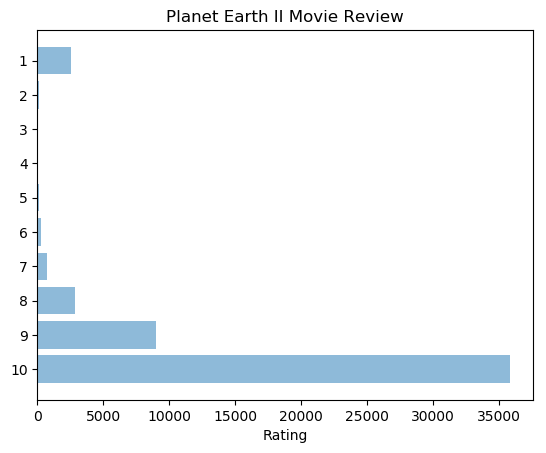

In [23]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (35807, 9002, 2836, 749, 253, 159, 82, 74, 108, 2574)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Planet Earth II Movie Review')
 
plt.show()

In [76]:
sum(votes) # Number of Votes of Planet Earth II

51644

In [77]:
#Band of Brothers Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0185906/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))


Title: Realistic

Review: I am an 80 year old combat veteran (88th Inf. Div. Italy).I watched BOB on the History Channel. I was so overwhelmed, indeed a bit panicked by the authentic nature of 90+% of the uniforms, signs, noises (I take exception to the sound of incoming artillery).I cried several times at the authentic staging - for them and me.I cannot believe I'll watch it again. It's too much. Too real.We never had so much water allowed in a shower.Rate: 10/10


Title: One of the best war movies/series ever

Review: I have read virtually all of Ambrose's WWII books, and this mini-series faithfully follows one of his best. The experience of these men of the 506th Parachute Infantry Regiment, 101st Airborne, was mirrored throughout the many divisions of Army and Marine ground troops in WWII. I feel that this series represents that collective experience in the finest, most forthright manner possible and pays tribute to them all. The acting, mostly by previously unheralded actors, was 

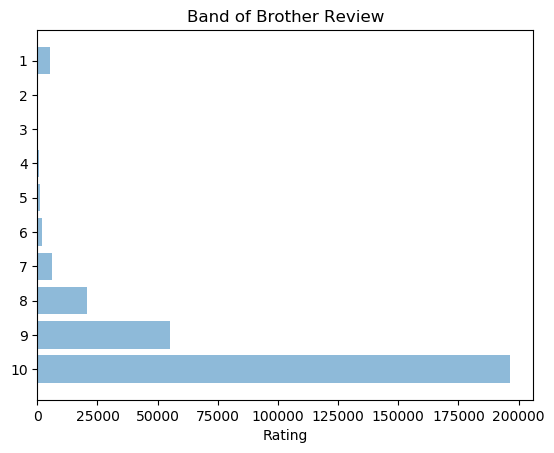

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (196343, 55056, 20493, 6129, 2114, 1162, 546, 454, 471, 5141)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Band of Brother Review')
 
plt.show()

In [79]:
sum(votes) #Number of Votes of Band of Brothers

287909

In [80]:

#Planet Earth Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0795176/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: A masterpiece of a documentary

Review: The camera work is truly breathtaking. Such amazing wonders captured on film, areas of the planet unspoiled by human domination. DIfferences in culture seem to play a big part in the reviews of this documentary; some choosing to review based on "Disney" like criteria. Criticisms for the apparent emphasis on the viscous and dark side of animals and nature. I guess some people would prefer a nice talking lion and perhaps an Elton john song thrown in.Cutting slack on the sarcasm and returning to the point; This is a must watch documentary for anybody with a sincere appreciation for life and the planet in which we live.An achievement for all those involved in the making to be proud of.


Title: 11 out of 10

Review: I don't think I can add anything to the previous 10 out of 10 comments, other than that I'd give it a full 11 out of 10 if this were possible. I have seen my share of nature documentaries, but this takes the cake. Utterly awe-inspi

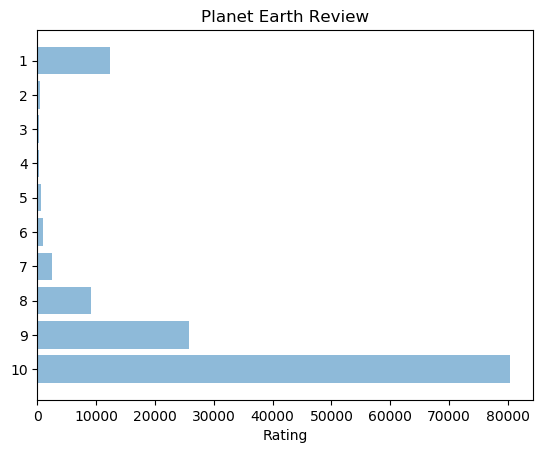

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (80323, 25722, 9121, 2550, 1000, 658, 308, 340, 424, 12298)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Planet Earth Review')
 
plt.show()

In [82]:
# Number of Votes of Planet Earth 
sum(votes)

132744

In [83]:
#Game of Throne Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0944947/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Finally, a Show that stays true to it's written roots

Review: As an avid reader, I am often disappointed by what is represented by the silver screen. I initially get excited to see one of my favorite series on the big screen, and eventually walk away disgusted. For whatever reason, most shows and movies that are based on epic book series absolutely butcher the original content. So when I saw the preview for "Game of Thrones" on HBO, I was immediately skeptical. Oh, I was going to watch it, but I didn't have high expectations. I did hold a little hope because HBO is known for their high quality shows. I was absolutely shocked to watch the Pilot and realize that it followed the book almost to perfection. The language that is used by the actors is very similar to the way that it was written in the book, and events were not skipped. It stayed very true to the story without adding to it or removing from it. The acting is superb and I actually felt like I was looking into Winterfell 

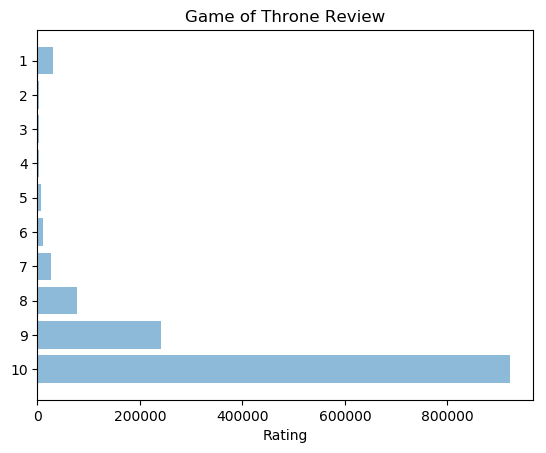

In [27]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (921394, 240386, 77619, 25865, 10200, 6509, 3644, 3339, 3068, 29560)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Game of Throne Review')
 
plt.show()

In [85]:
# Number of Votes of Game of Throne
sum(votes)

1321584

In [86]:
#Breaking Bad Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0903747/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: If you mix Scarface, Robin Hood and maybe Tyler Durden with enough meth - you'll get a mean cocktail called 'Heisenberg'

Review: If you are among the few who haven't seen it yet: believe the hype, it really is THAT good. Breaking Bad may not depict reality the way 'Generation Kill' or 'The Wire' did - but then it's not about that, either. From an artistic point of view - performances, writing, direction, camera, music - this show is every bit as good as the other two mentioned above, but unlike those, 'Breaking Bad' just wants to entertain and therefore enjoys a lot more creative freedom.The show plays like the daydream fantasy of any underachieving, struggling middle class family man who's had to bury all his dreams (I mean: who wouldn't want to be a meth-kingpin for a little while?), before it turns into a nightmare. One could almost say that 'Heisenberg' is Walter White's 'Tyler Durden'(for those who don't get the reference: watch 'Fight Club' - you won't regret it).For pure

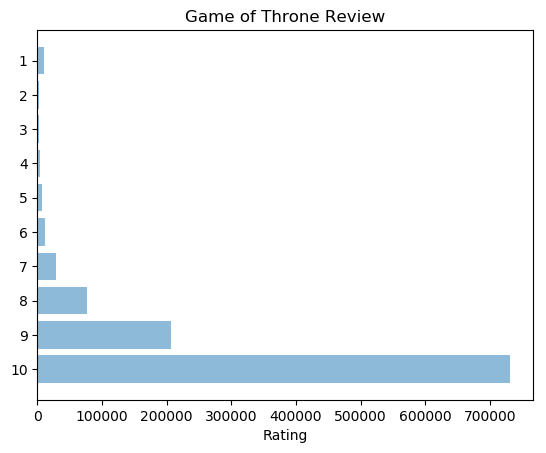

In [28]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (730521, 206183, 76914, 28793, 11304, 6476, 3350, 2624, 2369, 10465)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Game of Throne Review')
 
plt.show()

In [88]:
# Number of Breaking Bad of Throne
sum(votes)

1078999

In [96]:
#The Wire Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0306414/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Fantastic

Review: I don't subscribe to HBO. A couple of weeks ago I heard an interview with a young actor from this series on NPR. It was described as a "gritty crime drama" with many Baltimore locals portraying variations on themselves. The interview made it sound interesting enough that I decided to check out the first season on DVD.After the first few episodes I became seriously hooked and devoted 36 hours of the next ten days to the show.Having now watched the first 3 seasons, I believe it to be the best television series I have seen.I do not understand why this show hasn't generated the buzz or the awards of HBO's other series, such as the Sopranos or Deadwood. It is more gripping, faster paced, and more intelligent. The other shows can be a bit plodding, with plot lines that go nowhere, and a few characters I don't much care about. That wasn't the case here.The show is a cross between the Sopranos and the old NBC show Homicide: Life on the Street. The crime/sopranos side 

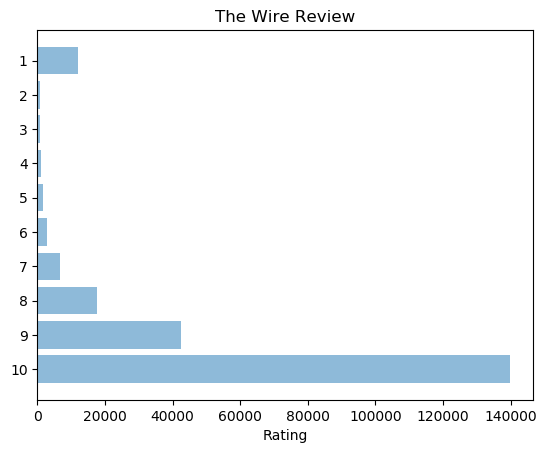

In [29]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (139714, 42604, 17546, 6644, 2961, 1805, 992, 916, 909, 12006)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('The Wire Review')
 
plt.show()

In [98]:
# Number of Vote of The Wire 
sum(votes)

226097

In [102]:
#The Cosmos: A Spacetime Odyssey Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt2395695/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: My First review

Review: i have been watching and loving films and TV shows for years now, and loving the study of the universe for even longer than that.that being said, this is the first time i have ever felt the need to create an account on IMDb solely to rate something a "10"this has an absolutely stunning, heartfelt, emotional introduction, and i only anticipate it getting better from here.i will probably update this review as the series goes on, or i may just review episodes individually. but either way, i firmly suggest that every human being on earth watch this show.have a good life everyone.


Title: For a program that makes us feel so small, Cosmos has a lot of heart

Review: Neil deGrasse Tyson's remake of Carl Sagan's original docu-series "Cosmos: A Personal Voyage". Carl Sagan allowed the public to see the wonders of science in an entertaining, thought-provoking and immensely educational way, and Tyson manages to capture the spirit and integrity of the original seri

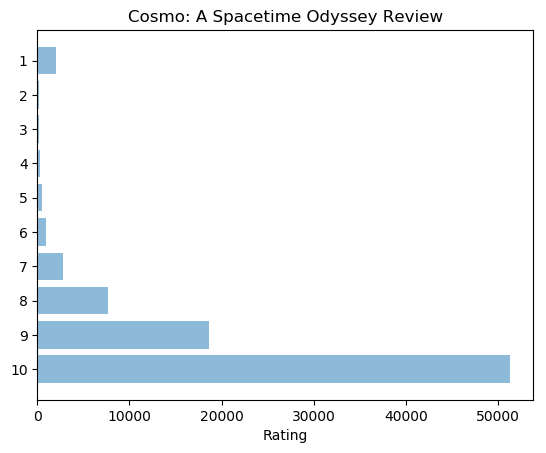

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (51297, 18692, 7647, 2801, 967, 518, 273, 226, 217, 1981)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Cosmo: A Spacetime Odyssey Review')
 
plt.show()

In [104]:
# Number of Votes of Cosmo: A Space Odyssey
sum(votes)

84619

In [109]:
#The Cosmos: A Spacetime Odyssey Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt2861424/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Easily the best show I've seen in a while

Review: This show is honestly great. It is easily the best animation show I have seen in a while on any network. The second the show starts you can tell that the characters fit perfectly with each other, and involved with the craziness that happens in the universe with Rick and Morty, they are immediately hilarious and extremely creative at the same time. A couple episodes in and I could tell that this was a unique show, and that people need to be watching it because it has huge potential. And with Dan Harmon writing and directing at the helm of it all, the magic that this show brings is a rare gem in television that people need to watch.. So yeah I highly suggest this show to anyone who wants a true genuine laugh at least once a week.


Title: Very solidly constructed television.

Review: This is an extremely solid show. It is *dark*, but there are certainly moments that approach the limits of any sort of television style format.The en

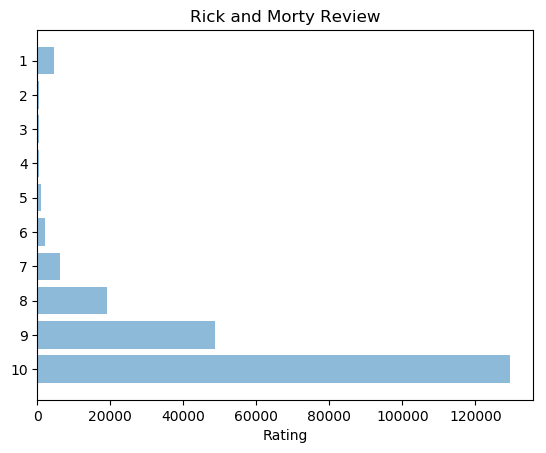

In [31]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (129400, 48744, 19125, 6076, 1985, 1065, 577, 544, 570, 4537)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Rick and Morty Review')
 
plt.show()

In [111]:
# Number of Votes of Rick and Morty Review
sum(votes)

212623

In [115]:
#The Cosmos: A Spacetime Odyssey Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0081846/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Greatest of All Time

Review: Cosmos is, hands-down, the greatest educational series of all-time. Even the wonderful (and highly recommended) history series Connections can't hold a flame to the perfection of Cosmos. If you don't believe me, look at the user ratings.It makes me tear up that most of my friends and almost all Americans don't know what Cosmos is (or what "cosmos" means), yet they can name every Friends cast member and their character's name and quirks.Computer graphics have come a long way since 1980, and just a few minor scientific updates are needed, but the series was so far ahead of its time that other than the spaceship deck set, the hair, and the clothes, it doesn't seem dated in 2004. It won the Peabody and Emmy awards, and remains to this day the most watched PBS series of all time (600+ million viewers in 60 countries).The series is 13-hours, but ought to count as a three semester hour (~45 hours of class) Intro to Cosmology college course. Sagan's ability

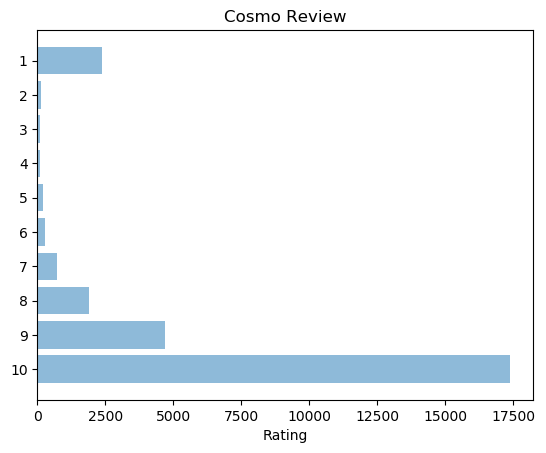

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (17364, 4705, 1914, 740, 290, 200, 107, 104, 120, 2361)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Cosmo Review')
 
plt.show()

In [117]:
# Number of Cosmo Review
sum(votes)

27905

In [118]:
#The Blue Planet II Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt6769208/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Blue is the new Blue

Review: Much will probably be discussed about the genuinely stunning photography in this series but it cannot be underplayed enough: it is imperious.Beautiful, beautiful shots of wonderful creatures going about their daily lives, together with informative narration and innovation. All rounded off accompanied by a blockbuster-movie-standard score which soars and settles with the visuals.This series took around four years to film, and I can only imagine what the poor editors had to leave out.Worthy of a mention is the astounding super-slow motion on display. In oceans so vast, we can see single droplets! It is a brilliant series for all ages.The BBC is unsurpassed at this type of documentary. And to think, the BBC costs UK taxpayers about 50 pence per day and some people think it should be cut down/split up/privatised. I really hope this doesn't happen as, yes, the BBC has faults like many broadcasters, but when it does something like this, it really cannot b

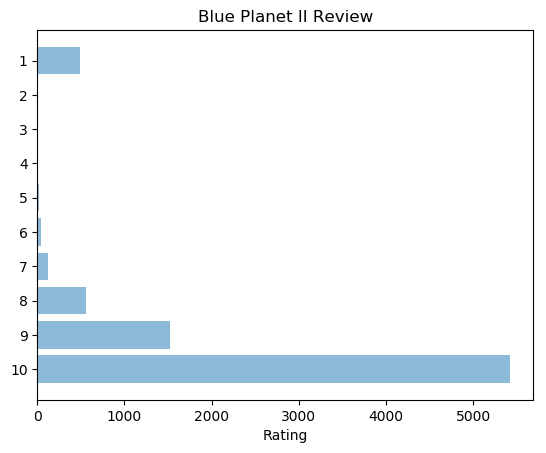

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (5421, 1523, 562, 126, 40, 16, 11, 11, 12, 494)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Blue Planet II Review')
 
plt.show()

In [123]:
# Number of votes of Blue Planet II
sum(votes)

8216

In [124]:
#The following is the top 10 movies review
#The Shawshank Redemption Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0111161/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Tied for the best movie I have ever seen

Review: Why do I want to write the 234th comment on The Shawshank Redemption? I am not sure - almost everything that could be possibly said about it has been said. But like so many other people who wrote comments, I was and am profoundly moved by this simple and eloquent depiction of hope and friendship and redemption. The only other movie I have ever seen that effects me as strongly is To Kill a Mockingbird. Both movies leave me feeling cleaner for having watched them.I didn't intend to see this movie at all: I do not like prison movies and I don't normally watch them. I work at a branch library and one day as I was checking The Shawshank Redemption out to one of our older patrons, she said to me, "Whenever I feel down or depressed, I check out this movie and watch it and it always makes me feel better." At the time, I thought that was very strange. One day there was nothing on TV except things I absolutely would not watch under any cir

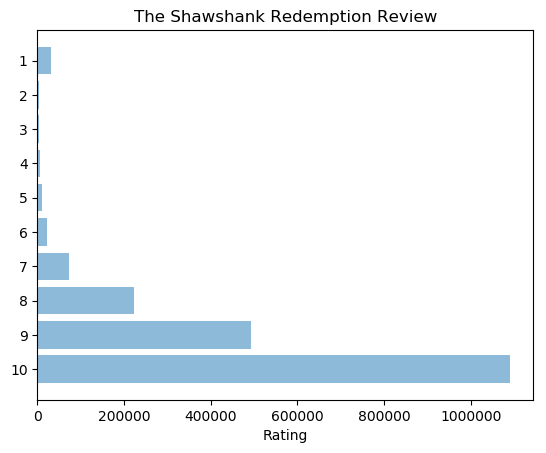

In [34]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (1090216, 492771, 223295, 72501, 21617, 10938, 5181, 4077, 3867, 31757)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('The Shawshank Redemption Review')
 
plt.show()

In [128]:
# Number of Votes of Shawshank Redemption
sum(votes)

1956220

In [131]:
#The God Father Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0068646/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: The Pinnacle Of Flawless Films!

Review: 'The Godfather' is the pinnacle of flawless films! The first time I viewed 'The Godfather' I was in my early teens and it was the most astounding film I had ever seen, and has since then stood as my all-time favourite film. It is due to this that I have been looking forward to writing a review of this unforgettable classic. So let's start from the beginning. The film opens to four words, 'I believe in America', it's crazy to think that this simple line has become a resonant quote solely due to the impact it made on the entrance to the film's "threshold". This is just one of the many renowned quotes that litter the film, and believe me, there are a lot. After the first take we are then absorbed into the life of Vito Corleone, brilliantly portrayed by the Oscar- winning performance of Marlon Brando. Vito is a feared man, he is a criminal, he is a mafioso, but above all he is a respected family man, his three sons are depicted by three excel

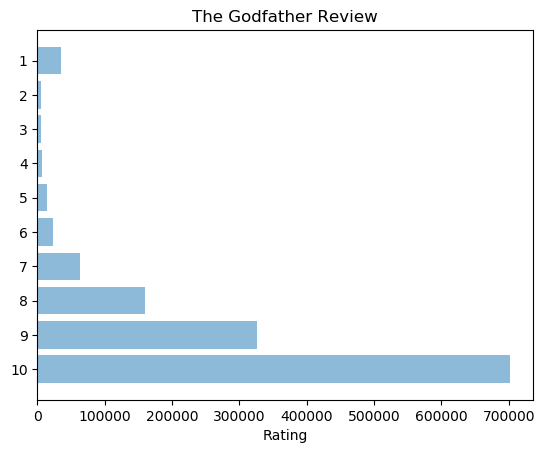

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (701618, 326171, 159215, 63111, 23579, 13620, 6784, 5376, 5218, 34501)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('The Godfather Review')
 
plt.show()

In [134]:
# Number of Vote of Godfather 
sum(votes)

1339193

In [135]:
#The God Father II Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0071562/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Breathtaking in its scope and tragic grandeur...

Review: Coppola's masterpiece is rivaled only by "The Godfather, Part II" in which the 1940s setting of the first movie is extended backwards and forwards to reveal the corrupting effect of power...The film, breathtaking in its scope and tragic grandeur, shows two parallel stories extending two different time periods: the early career of young Vito Corleone seen first around the turn of the 20th century in Sicily, and then in 1917, building his criminal underworld in the Italian ghettos of New York City, post World War I, plus that of his son, Michael (Al Pacino) desperately trying to keep his family together...Al Pacino's performance is quiet and solemn... He is cold and ruthless, with a whole contrast from the idealistic innocent war hero we initially met at the beginning of the first film... Here he's a calculating and frightening force, seeking to expand casinos into Pre-Revolutionary Cuba and consolidating an empire surround

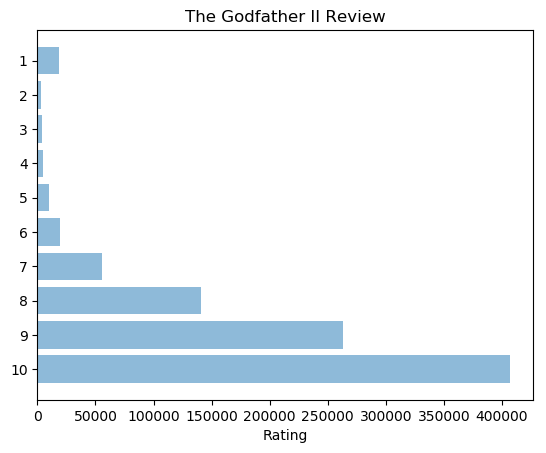

In [36]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (406609, 263146, 140644, 55842, 19581, 10187, 4875, 3756, 3410, 18480)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('The Godfather II Review')
 
plt.show()

In [137]:
# Number of Vote of Godfather II
sum(votes)

926530

In [138]:
#The Dark Knight Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0468569/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Film surpasses the hype

Review: We've been subjected to enormous amounts of hype and marketing for the Dark Knight. We've seen Joker scavenger hunts and one of the largest viral campaigns in advertising history and it culminates with the actual release of the movie.Everything that's been said is pretty much spot on. This is the first time I can remember where a summer blockbuster film far surpasses the hype.For as much action as there is in this movie, it's the acting that makes it a great piece of work. Between all the punches, explosions and stunt-work is some great dialog work. All the actors have their moments.Bale's Batman is the definitive Batman because we see everything in this character finally on film. Martial arts skills, cunning, great tactical thinking, forensic application, technological genius to advance or improve Luscious Fox's inventions/technological breakthroughs, intimidating personality, and even a little swashbuckling. As for Heath, yes he gets credit for

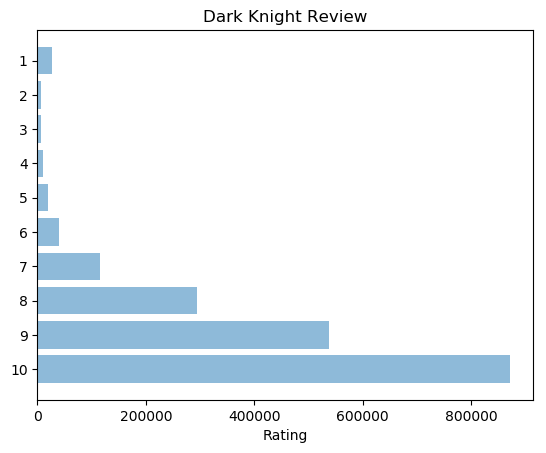

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (871345, 537708, 294005, 114764, 40028, 19625, 9586, 7139, 6422, 27839)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('Dark Knight Review')
 
plt.show()

In [140]:
# Number of Vote of Dark Knight
sum(votes)

1928461

In [144]:
#The 12 Angry Men Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0050083/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Excellent

Review: An excellent courtroom drama with a unique twist. Instead of following the trial itself, the viewer has a unique chance to observe the events behind the closed doors of a jury room. The film begins with the end of the trial. The jurors retire to deliberate the case. A preliminary vote is taken and the result is 11:1 in favour of the guilty verdict. Eleven jurors have raised their hands to convict a young man of killing his father. Only Juror #8 has doubts. At first even he does not truly believe the young man to be innocent but notes (rightfully) that the case for the defence might have been presented in a more convincing manner and that the boy might be given the benefit of a doubt. Since the boy is to be executed if found guilty his life is now in the hands of the jury and juror #8 reasons that the least they could do is talk about the case a bit. As time goes on some of the jurors change their minds and find that there is perhaps enough reasonable doubt not

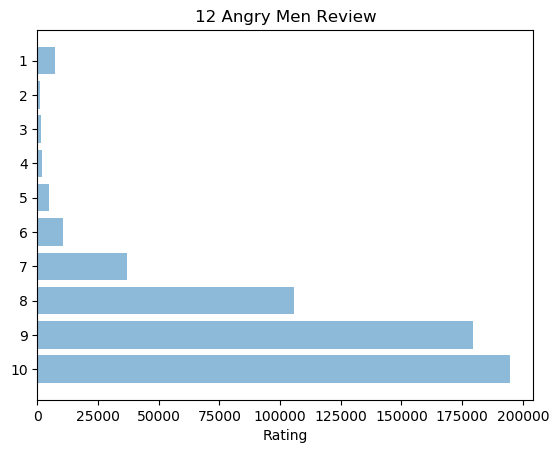

In [38]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (194585, 179357, 105897, 37119, 10483, 4765, 2003, 1392, 1272, 7314)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title('12 Angry Men Review')
 
plt.show()

In [146]:
# Number of Vote of 12 Angry Men
sum(votes)

544187

In [147]:
#The Schindler's List Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0108052/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Spielberg's Sentimentality, Again

Review: Spielberg is now the Numero Uno director of schmaltzy cinema. I thought Saving Private Ryan was the ultimate good guys save the poor soul, but this one outdoes Ryan in every conceivable heart-tugging, noble humanity fashion. Don't view this film as accurate history, ifPrivate Ryan is any guide. Historical accuracy is not a Spielberg characteristic. It's the heartstrings he keeps tugging. I next expect a new Pollyanna by Spielberg any day now. The problem with Spielberg's characterizations is that people are either black or white, no inbetweens are allowed. But even  old Adolph can be presented in a way that makes him the human being that he was, regardless. This is what makes Shakespeare such a genius in his plays - he never failed to see all sides of a personality. Spielberg's characterizations are cartoons. This could have been a really good movie, if it had acknowledged thehumanity in every person and been realistic.


Title: don't t

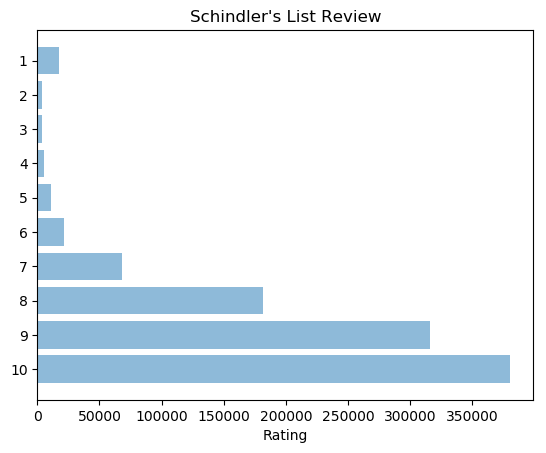

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (380264, 315874, 182045, 67965, 21483, 10944, 5127, 4032, 3877, 17541)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Schindler's List Review")
 
plt.show()

In [149]:
# Number of Vote of The Schindler's List
sum(votes)

1009152

In [150]:
# The The Lord of the Rings: The Return of the King Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0167260/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Unprecedented.

Review: Peter Jackson has done it.  He has created an all-encompassing epic saga of Tolkien's Lord of the Rings books, and after coming away from the final chapter, how does this rate not only as a film on its own, but as a part of the whole?Perfect.I've never seen a series like this.  A trilogy of movies created with such love and care and utter perfection of craft that you can't help but walk away and wonder how did Peter Jackson make this possible?  I have always loved the original "Star Wars" and "Indiana Jones" series for their epic storytelling, and just for just fitting in as a great moment in cinema. This should be, will be, remembered with as much revered fondness for generations to come.  They do not make films like these anymore.As a stand alone film, it picks up immediately where "Two Towers" ends, so brush up before seeing it.  I've read the books, and the anticipation of seeing some of the more profound moments in this film made me kind of view it w

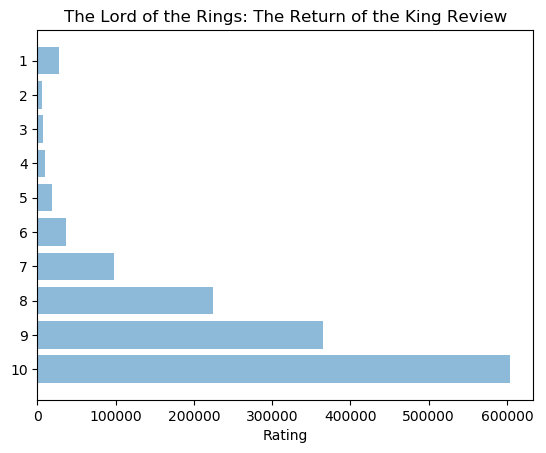

In [40]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (603688, 364684, 225046, 98368, 37051, 18394, 9180, 7118, 5913, 27159)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Lord of the Rings: The Return of the King Review")
 
plt.show()

In [152]:
# Number of Votes of  The Lord of the Rings: The Return of the King Review
sum(votes)

1396601

In [155]:
# The Pulp Fiction Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0110912/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: The masterpiece without a message

Review: One of the early scenes in "Pulp Fiction" features two hit-men discussing what a Big Mac is called in other countries. Their dialogue is witty and entertaining, and it's also disarming, because it makes these two thugs seem all too normal. If you didn't know better, you might assume these were regular guys having chit-chat on their way to work. Other than the comic payoff at the end of the scene, in which they use parts of this conversation to taunt their victims, their talk has no relevance to anything in the film, or to anything else, for that matter. Yet without such scenes, "Pulp Fiction" wouldn't be "Pulp Fiction." I get the sense that Tarantino put into the film whatever struck his fancy, and somehow the final product is not only coherent but wonderfully textured.It's no wonder that fans spend so much time debating what was in the suitcase, reading far more into the story than Tarantino probably intended. The film is so intricatel

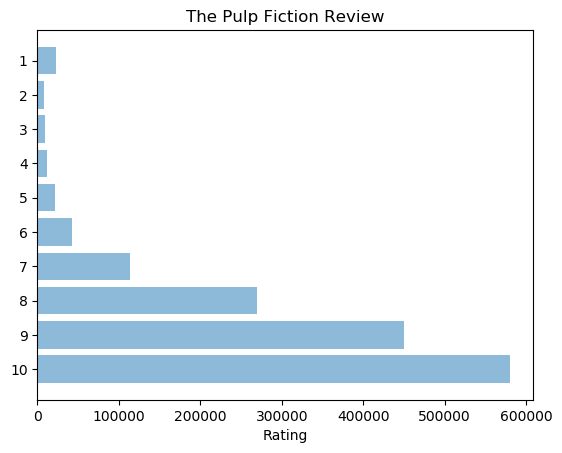

In [41]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (579787, 450353, 269403, 114108, 42293, 22206, 11788, 9004, 7899, 23168)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Pulp Fiction Review")
 
plt.show()

In [157]:
# Number of Votes of Pulp Fiction
sum(votes)

1530009

In [159]:
# The Good, the Bad and the Ugly Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0060196/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: An epic Sergio Leone's masterpiece the best spaghetti gold Western film in the Dollars Trilogy!

Review: The Good, the Bad and the Ugly (1966) is an epic classic Sergio Leone's masterpiece film and a great conclusion to "the Man with No Name" Trilogy. This is my number 1 favorite Spaghetti Western about the Civil War and three gunslingers on a search for a lost gold. I love this film to death. It is my personal favorite western movie of all time. Clint Eastwood, Eli Wallach and Lee Van Cleef are the best of the film in their roles. It has a great showdown in the cemetery on the end of the film, the way how it is edited. The cuts with people's faces and close up shots. I love this film to death and it is my number one favorite western in the trilogy. If I had to put then into a 'favorite ranking' list? 1. The Good, The Bad and The Ugly, 2. A Fistful of Dollars and For a Few Dollars More. Those are all three best masterpieces ! They are my favorite Clint Eastwood western movies in

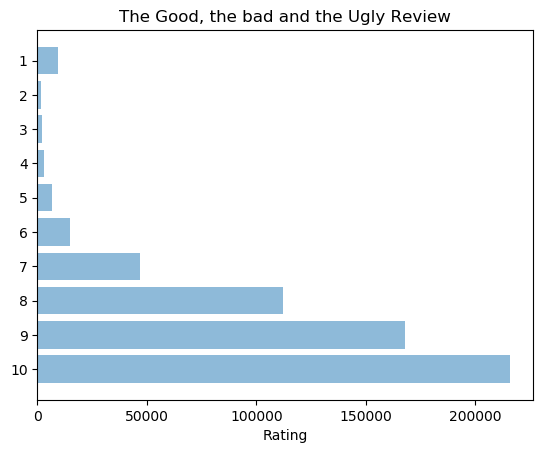

In [42]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (215667, 167970, 112124, 46937, 14814, 6859, 2985, 2103, 1804, 9607)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Good, the bad and the Ugly Review")
 
plt.show()

In [161]:
# Number of Votes The Good, the Bad and the Ugly
sum(votes)

580870

In [162]:
# The Fight Club Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0137523/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: A unique film

Review: Fight Club is one of the most unique films I have ever seen. In addition to presenting a rather fresh take on life, FC also presents its material in a fresh way. My main interest in the film is in that, in my opinion, it does not present characters for us to think about. Rather, it presents actions for us to think about. I will say that I cannot recall *ever* having been "asked" by a film to both suspend my disbelief the way this film asks in its third act AND at the same time come to terms with an understanding that there is no room--or need--for disbelief.Perhaps these comments will not make sense to the average movie goer who will dismiss this film--and, unfortunately, its premise--as another hollywood flick filled with gratuitous violence. I'd go as far as to say that this film is not about violence. It is about choices. It is about activity. It is about lethargy. It is about waking up and realizing that at some point in the past we've gone to the toil

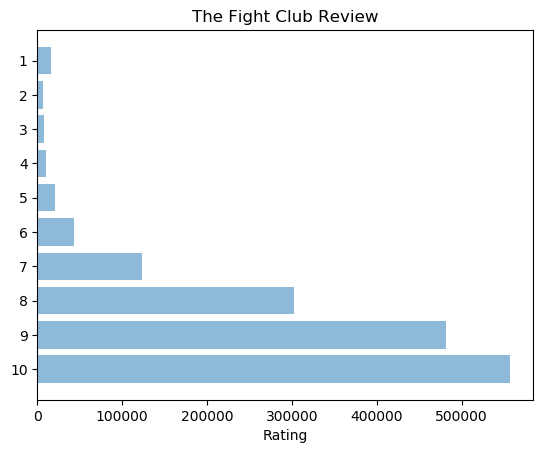

In [43]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (556729, 482091, 302297, 123447, 43366, 20565, 10503, 7553, 6226, 15709)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Fight Club Review")
 
plt.show()

In [164]:
# Number of Votes of Fight Club
sum(votes)

1568486

In [1]:
#The following is the bottom 10 movies review
#The Titanic: The legend Goes On Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0330994/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: The first Titanic film where the iceberg is the hero

Review: OK, normally I go into a paragraph of introduction on how I came across this film and a little bit about the film or film trivia, well not this time, I'm going to let you judge for yourself on just what I'm going to tell you with this "story".The movie starts off with the ending... ??? Yeah, the ship sinks, sorry to spoil this movie for you already. But anyways we have a man and a woman rowing in a lifeboat, rowing, rowing, rowing as we hear people screaming for their lives on the sinking ship. We pan into the woman's eye into a flashback, a la Titanic(1997), and right before the same woman, Angelica, boards the Titanic, we see she is actually a servant to her evil step mother and her two evil step sisters, a la Disney's Cinderella. She has a blue colored locket necklace, a la Titanic(1997), inside there is a picture of her mother, oh what happened to her mother? Of course the evil step family taunts her pain and that

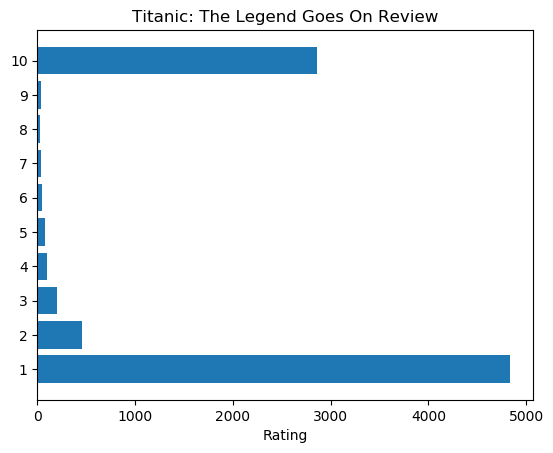

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y_pos = np.arange(len(Rating))
votes = (4831, 461, 201, 101, 81, 50, 38, 23, 42, 2856)
 
plt.barh(y_pos, votes, align='center', alpha=1.0)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Titanic: The Legend Goes On Review")

plt.show()

In [5]:
# Number of Votes of Titanic: The legend Goes On Review 
sum(votes)

8684

In [6]:
#The Dream.net Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt1309000/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Really bad

Review: Even though I heard from many independent and reliable sources that this movie is bad, nay, one of the worst high-budget films ever made, I was skeptical. I have now watched it and can confirm it as one of the all-time low of international filmmaking. A drama without a single trace of suspense or excitement, a love story without a single romantic line, a teen comedy with very few traces of very trite and embarrassing humor, this movie is a MUST. Without having seen it, one will forever lack the experience of a truly, authentically, genuinely bad film.The only mystery that remains is who on earth sponsored this celluloid waste and what on earth made some of Hungary's prominent comic actors (notably Gábor Reviczky) subscribe to it.To sum up: the trite and/or hilariously out-of-place dialogs, the embarrassing discontinuities, and the sub-YouTube-dilettante quality of acting and directing make it difficult to believe that this movie was ever meant to be taken ser

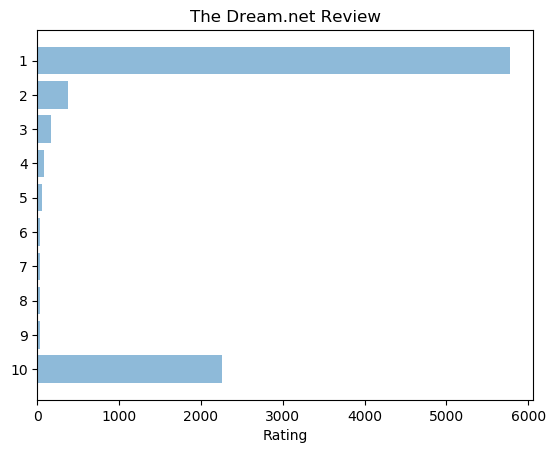

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (2259, 36, 28, 31, 38, 57, 83, 164, 377, 5775)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("The Dream.net Review")
 
plt.show()

In [24]:
# Number of Dream.Net Review 
sum(votes)

8848

In [1]:
#The Turks in Space Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0808240/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Mindbogglingly awful

Review: Every major cult film fan has watched "Dunyayi Kurtaran Adam" (Man who saves the world) aka Turkish Star Wars. Quarter a century after that was released ,we get a sequel -"Dunyayi Kurtaran Adamin oglu" (Son of the man who saves the world). While the original was meant to be a serious science fiction adventure, this one attempts to be a parody of the old film and various other science fiction films in the vein of G.O.R.A. Needless to say, the result is cinematic sewage.The film is a basically a serious of gags , none of which are close to being remotely funny. The acting is even worse. Erbil has already sealed his spot in the acting hall of shame with the lame shrek-wannabe Keloglan (he was even worse than Petek Dincoz, which should tell you how amazingly bad he was). Cuneyt Arkin seems to be sleepwalking. Sinem Kobal who is one of the most promising young Turkish actresses working today, would want to erase this off her resume for her career's sake.

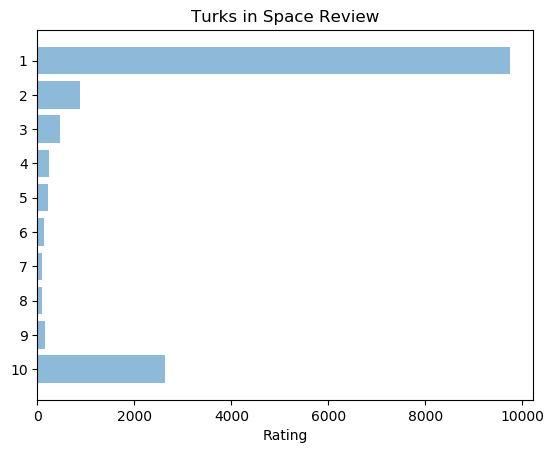

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
y_pos = np.arange(len(Rating))
votes = (2631, 163, 86, 97, 132, 220, 241, 474, 877, 9741)
 
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Turks in Space Review")
 
plt.show()

In [3]:
# Number of Votes of Turks in Space
sum(votes)

14662

In [6]:
#The Pledge This Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0417056/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: No Rating lower than a one

Review: I have often used the phrase the worst movie I have ever seen when describing a movie that I did not enjoy. That was until I saw Pledge This. ever since then I have been unable to say worst movie ever because I know that it wasn't as bad as this one. Ill admit I thought I knew what I was getting into when I saw this movie. I knew that it was National Lampoon and how that name no longer means what it did in the 70s and 80s. I knew that it was staring Paris Hilton so that I shouldn't really expect anything majestic. But I thought that it would be a more or less fun 90 minutes if i wanted to watch a simple brainless sex comedy with lots of fart jokes. Boy was I wrong. There is nothing good about this movie. Not the story obviously or the acting. But I was almost stunned to see how bad the rest of the movie was. It was poorly edited, the quality was awful. One whole scene took place in a white room and the walls were so bright that I couldn't even

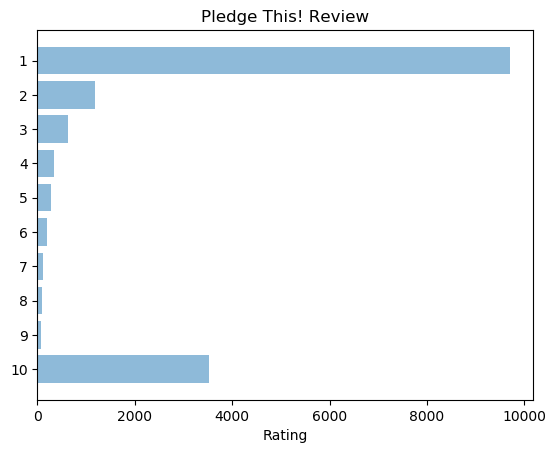

In [20]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (3528, 76, 95, 111, 191, 271, 351, 636, 1182, 9698)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Pledge This! Review")
 
plt.show()

In [12]:
# Number of Votes of Pledge This
sum(votes)

16139

In [13]:
#The Foodfight! Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0249516/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Wait, what?

Review: You know, this review isn't based on the premise that this is an egregious film. It is, I agree that this film is abhorrent. However, the legend surrounding this lukewarm, atrocious piece of media is far more enjoyable than this pile of excrement. This *ahem* "film" came out December of 2012. It was supposed to come out in December of 2002. The film was stolen, and that was probably for the best. However, because the directors had faith (or fear that they'd lose 45 MILLION DOLLARS) for this film, so they began again from scratch. And what we got was probably the worst thing of all time.If this movie was a regular Hollywood flop I'd maybe forgive it. But on account of how atrociously awful this film is in any aspect, I'd expect it to be made by a 17 year cannabis addict who maybe knows a bit of VFX. But this is a 45 million dollar animated film starring Charlie Sheen and Dwayne Brady. If Clerks can be made with a 25,000 dollar budget and Napolian Dynamite for

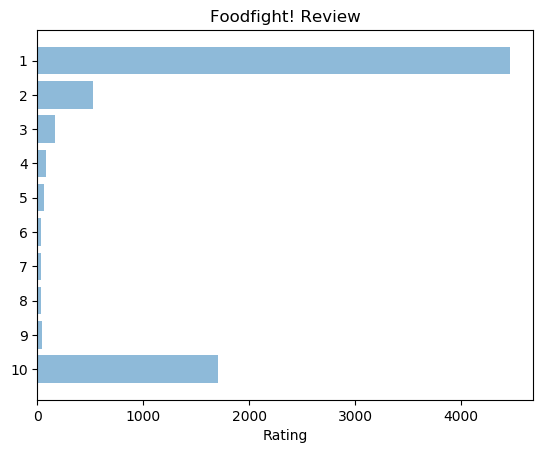

In [44]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (1702, 43, 33, 33, 32, 64, 81, 165, 529, 4462)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Foodfight! Review")
 
plt.show()

In [22]:
# Number of Votes of Foodfight!
sum(votes)

7144

In [45]:
#The Manos: The Hands of Fate Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0060666/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Your eyes and ears will BLEED!

Review: Some films are so bad, they're good. Meaning "fun" or "entertaining" or at least "interesting"... But few films can claim to be so dreadful, you actually feel physical pain while viewing them. So bad are these damned few that you don't experience them or watch them: you "endure" them. This is the mother of all such films!"Manos the hands of fate" is without a doubt the most inept and atrociously awful film ever made. Its poorness is so extreme that of itself it is the film's strongest selling point. The script is non-existent, the acting makes Steven Seagal look like a member of the Royal Shakespeare Company and the editing could have been less horrendously botched by a blind Eskimo with no arms. It is also painfully slow. this film makes might barely last 70 minutes but you will feel like you've aged ten years by the end of it. That's what makes a film truly bad: the fact that despite its overbearing weaknesses it isn't even entertaining!

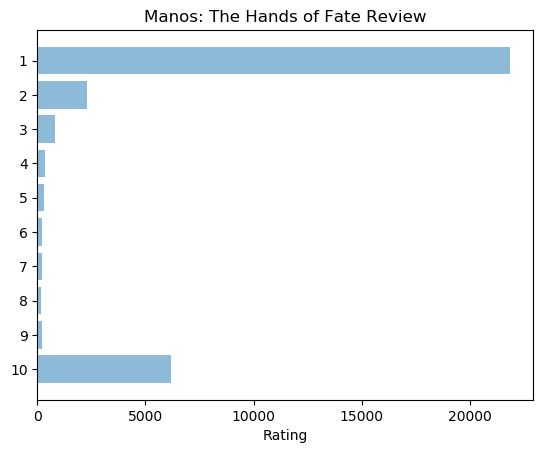

In [46]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (6165, 218, 186, 204, 217, 328, 363, 815, 2309, 21849)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Manos: The Hands of Fate Review")
 
plt.show()

In [47]:
# Number votes of Manos: The Hands of Fate
sum(votes)

32654

In [48]:
#The Daniel the wizard Review 
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0421051/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: Worst movie i've ever seen

Review: A week ago i watched Daniel der Zauberer. I wanted to give it a chance after all the bad reviews it had received. This foolish idea ended up being just a waste of my precious time.THe plot reads as follows: A boy who became famous through a TV show has problems with people who don't like his music. The main character is played by daniel kueblboeck, the new star from Germans pop idol (so Kueblboeck actually plays himself). After all I'm proud i made it through the movie. To be honest i only watched it till the end to write about it. The movie itself is so bad it almost hurts physically. So this is a warning : DO NOT WATCH THIS MOVIE!! DO NOT GIVE IT A CHANCE!( unless you are either a masochist or a küblböck fan). Don't say i didn't want you. This movie should receive a 0 Voting instead of an awful.


Title: German singer Daniel Küblböck plays himself in a dramatic bad art-movie

Review: This is probably the worst movie ever.Daniel Küblböck shou

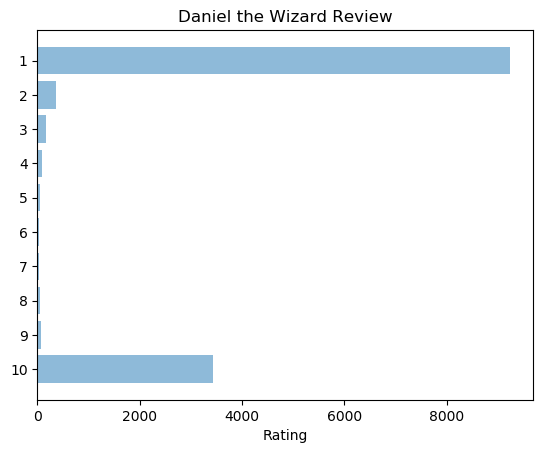

In [49]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (3428, 75, 47, 36, 42, 59, 87, 169, 356, 9235)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Daniel the Wizard Review")
 
plt.show()

In [50]:
# Number votes of Daniel the Wizard
sum(votes)

13534

In [51]:
# The Superbabies: Baby Geniusese 2 Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0270846/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: A Great Movie From Sony Pictures. It is unjust to be under-rated!.

Review: Superbabies:Baby Geniuses 2 is a perfect movie for kids. It has all the elements of success: entertainment,great acting, amazing direction and a good story. It is unfair to see some unjust critics harshly criticizing entertaining and good children movies because they are not paid from movie makers .Four genius babies play detectives and cleverly fighting evil.Media mogul Bill Biscane kidnaps innocent children everywhere and there is a cute and smart child called Kahuna who after drinking a special chemical he becomes a strong kid just like a superman, he changes into a super-baby to fight evil and rescue the lives of his friends.I have absolutely enjoyed watching this stunning movie.Alas it is too good to be under-rated!.


Title: Best movie I have ever watched

Review: This movie is the best movie I have ever watched. Even masterpieces like E.T, Jaws and even Avatar can't beat this movie.The acting was 

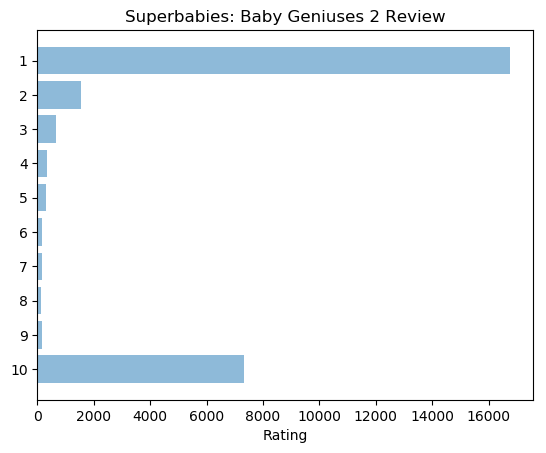

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (7332, 152, 135, 171, 171, 300, 355, 663,1535, 16749)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Superbabies: Baby Geniuses 2 Review")
 
plt.show()

In [53]:
# Number votes of Superbabies: Baby Geniusese 2
sum(votes)

27563

In [54]:
# The Saving Christmas Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt4009460/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: An interminable, shoddily-researched lecture masquerading as comedy

Review: For those of us who have watched Kirk Cameron pontificate on the wonders of the banana, or read his musings on the legitimacy of the existence of fire-breathing dragons, we know that Kirk Cameron himself is comedy gold. One might expect more hilarity from Cameron in Saving Christmas, but Cameron actually intentionally tries to build a comedy here, and the result is an unfunny, unfocused, interminable mess.The film begins with an uncomfortable scene involving Kirk Cameron sitting in a chair, lecturing at the audience. "They don't want us to love Christmas," Cameron declares authoritatively, never bothering to define exactly who "they" are. Cameron drones on for several more minutes, and at this point in the film, I heard a kid in the back of the theater yawn loudly—perhaps an audible protest that this film would not be the exciting romp promised on the poster.Finally, the film cuts away from Kirk Cameron

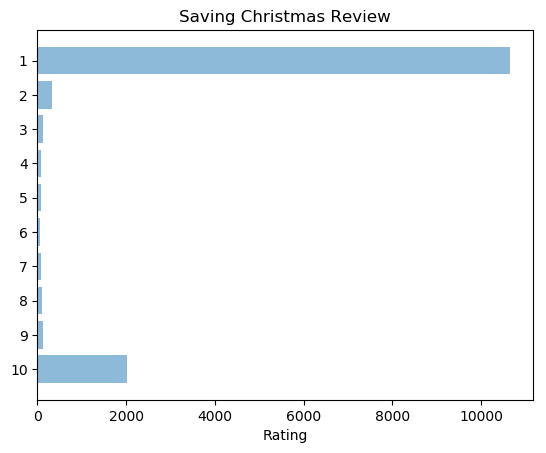

In [55]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (2012, 129, 101, 89, 56, 74, 75, 128, 325, 10641)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Saving Christmas Review")
 
plt.show()

In [56]:
# Number votes of Saving Christmas
sum(votes)

13630

In [57]:
# The Saving Christmas Review
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt4458206/reviews?ref_=tt_urv'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text
    review = item.select(".text")[0].text
    print("Title: {}\n\nReview: {}\n\n".format(title,review))

Title: If you want to make propaganda, at least make it good

Review: A really horrible film which only aims to increase support for the idiotic things the government did and will do. It implies that almost every bad event happened in the past 10-15 years is because of a terrorist organization which works together with CIA, Mossad etc. It is so idiotic that it shows the gezi protests like something that was controlled behind a screen by the same organization (which clearly doesn't exist) What can I say, if you are stupid enough to believe these things (unfortunately many people are) you may like the film but that doesn't change the fact that it's a poorly written and pathetically directed propaganda and a decent director could do something better while he's in the toilet.


Title: This so-called movie is a propaganda !

Review: Shame on the directors, the purpose of this so-called movie is clearly politically motivated. The intention smells very bad a political propaganda reminding Goe

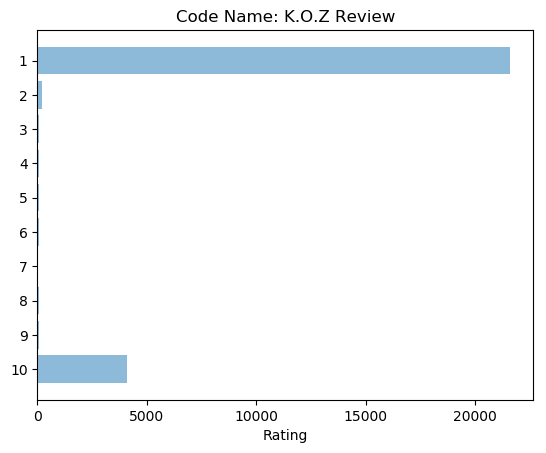

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
y_pos = np.arange(len(Rating))
Rating = (10, 9, 8, 7, 6, 5, 4, 3, 2, 1)

votes = (4084, 96, 59, 51, 55, 72, 58, 88, 201, 21586)
plt.barh(y_pos, votes, align='center', alpha=0.5)
plt.yticks(y_pos, Rating)
plt.xlabel('Rating')
plt.title("Code Name: K.O.Z Review")
 
plt.show()

In [59]:
# Number votes of Code Name: K.O.Z
sum(votes)

26350